<a href="https://colab.research.google.com/github/Martim-21805485/IASolucoes/blob/main/Lab6_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6
> Search Algorithms

## Purpose
Study the British Museum Procedure, Uninformed Search Algorithms.

## Methodology
Implementation of Depth and Breadth First Search.

## Setup

### Library import

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

## Data import
We retrieve all the required data for the analysis.

In [ ]:
edges = [('A', 'B'),
     ('B', 'C'),
     ('B', 'E'),
     ('B', 'F'),
     ('C', 'A'),
     ('C', 'D'),
     ('C', 'F'),
     ('D', 'F'),
     ('D', 'G'),
     ('G', 'H')
    ]

## Data processing
Put here the core of the notebook. Feel free di further split this section into subsections.

In [ ]:
G = pd.DataFrame(edges, columns=['Start', 'End'])
G['Weight'] = 1
G

,Start,End,Weight
0,A,B,1
1,B,C,1
2,B,E,1
3,B,F,1
4,C,A,1
5,C,D,1
6,C,F,1
7,D,F,1
8,D,G,1
9,G,H,1


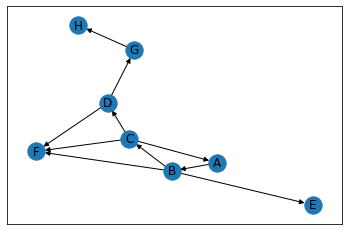

In [ ]:
import networkx as nx

nG = nx.from_pandas_edgelist(G, source='Start', target='End', edge_attr='Weight', create_using=nx.DiGraph)
nx.draw_networkx(nG)

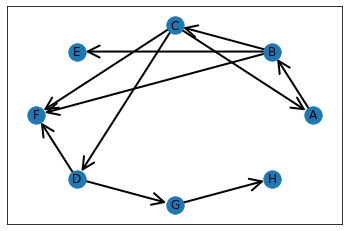

In [ ]:
options = {
    'width': 2,
    'arrowstyle': '->',
    'arrowsize': 30,
}
pos = nx.circular_layout(nG)   
nx.draw_networkx(nG, pos, with_labels = True, 
                 edge_color = 'black', arrows=True, **options)

If you want to look at more networks' visualization libraries in Python you can start at [link](https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259)

In [ ]:
G.groupby('Start').apply(lambda x: list(x['End']))

Start
A          [B]
B    [C, E, F]
C    [A, D, F]
D       [F, G]
G          [H]
dtype: object

In [ ]:
graph = G.groupby('Start').apply(lambda x: list(x['End'])).to_dict()
graph

{'A': ['B'],
 'B': ['C', 'E', 'F'],
 'C': ['A', 'D', 'F'],
 'D': ['F', 'G'],
 'G': ['H']}

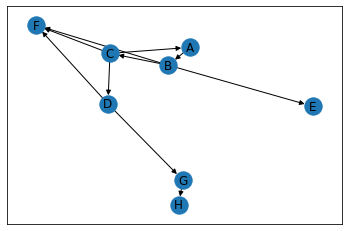

In [ ]:
import networkx as nx

nG = nx.from_pandas_edgelist(G, source='Start', target='End', edge_attr='Weight', create_using=nx.DiGraph)
nx.draw_networkx(nG)

## Uninformed Search

### Basic

In [ ]:
def uninformed_search_basic(graph: dict, init: str, goal: str):
    """
    Exhaustive search
    """
    # Keep path right from the start
    queue = [init]
    
    # Iteration counter
    i=0
    while queue:
        
        # Update iteration
        i+=1
        
        
        head = queue[0] 
        remainder = queue[1:]

        # Show the queue
        print('Iteration {}'.format(i))
        print('Queue :{}\nQueue Size: {}\nRemainder:{}'.format(queue,
                                                             len(queue),
                                                             remainder))
        
        print('Head:{}, Goal:{}, Reached Goal: {}'.format(head, goal, head == goal))
        if head == goal: 
            print('Found {}'.format(goal)) 
            break
            
        else:
            is_terminal_node = head not in graph
            print('is Head a Terminal Node: {}'.format(is_terminal_node))
            if is_terminal_node:
                queue = remainder
                print('Updated Queue: {}'.format(queue))
            else:
                possible_paths = [out for out in graph[head]] 
                print('Possible path from Head {}: {}'.format(head, possible_paths))
                queue = remainder + possible_paths 
                print('Updated Queue: {}'.format(queue))       
        print('- - - - ')

In [ ]:
uninformed_search_basic(graph, 'A', 'F')

Iteration 1
Queue :['A']
Queue Size: 1
Head: A
Remainder:[]
Head:A, Goal:F, Reached Goal: False
is Head a Terminal Node: False
Possible path from Head A: ['B']
Updated Queue: ['B']
- - - - 
Iteration 2
Queue :['B']
Queue Size: 1
Head: B
Remainder:[]
Head:B, Goal:F, Reached Goal: False
is Head a Terminal Node: False
Possible path from Head B: ['C', 'E', 'F']
Updated Queue: ['C', 'E', 'F']
- - - - 
Iteration 3
Queue :['C', 'E', 'F']
Queue Size: 3
Head: C
Remainder:['E', 'F']
Head:C, Goal:F, Reached Goal: False
is Head a Terminal Node: False
Possible path from Head C: ['A', 'D', 'F']
Updated Queue: ['E', 'F', 'A', 'D', 'F']
- - - - 
Iteration 4
Queue :['E', 'F', 'A', 'D', 'F']
Queue Size: 5
Head: E
Remainder:['F', 'A', 'D', 'F']
Head:E, Goal:F, Reached Goal: False
is Head a Terminal Node: True
Updated Queue: ['F', 'A', 'D', 'F']
- - - - 
Iteration 5
Queue :['F', 'A', 'D', 'F']
Queue Size: 4
Head: F
Remainder:['A', 'D', 'F']
Head:F, Goal:F, Reached Goal: True
Found F


### Visitors

In [ ]:
def uninformed_search_visitors(graph: dict, init: str, goal: str):
    """
    Exhaustive search with visited
    """
    # Keep path right from the start
    queue = [init]
    
    # Iteration counter
    i=0
    
    # keep visited
    visited = []
    while queue:
        # add iteration
        i+=1
        head = queue[0] 
        remainder = queue[1:]

        # Show the queue
        print('Iteration {}'.format(i))
        print('Queue :{}\nQueue Size: {}\nRemainder:{}'.format(queue,
                                                             len(queue),
                                                             remainder))
        
        print('Head:{}, Goal:{}, Reached Goal: {}'.format(head, goal, head == goal))
        if head == goal: 
            print('Found {}'.format(goal)) 
            break
        else:
            visited.append(head)
            print("Nodes visited: {}".format(visited))
            is_terminal_node = head not in graph
            print('is Head a Terminal Node: {}'.format(is_terminal_node))
            if is_terminal_node:
                queue = remainder
                print('Updated Queue: {}'.format(queue))
            else:
                possible_paths = [out for out in graph[head]] 
                print('Possible path from Head {}: {}'.format(head, possible_paths))
                valid_paths = [out for out in possible_paths if out not in visited]
                print('Nodes not yet visited from Head {}: {}'.format(head, valid_paths))
                queue = remainder + valid_paths 
                print('Updated Queue: {}'.format(queue))       
        print('- - - - ')

In [ ]:
uninformed_search_visitors(graph, 'A', 'H')

Iteration 1
Queue :['A']
Queue Size: 1
Head: A
Remainder:[]
Head:A, Goal:H, Reached Goal: False
Nodes visited: ['A']
is Head a Terminal Node: False
Possible path from Head A: ['B']
Nodes not yet visited from Head A: ['B']
Updated Queue: ['B']
- - - - 
Iteration 2
Queue :['B']
Queue Size: 1
Head: B
Remainder:[]
Head:B, Goal:H, Reached Goal: False
Nodes visited: ['A', 'B']
is Head a Terminal Node: False
Possible path from Head B: ['C', 'E', 'F']
Nodes not yet visited from Head B: ['C', 'E', 'F']
Updated Queue: ['C', 'E', 'F']
- - - - 
Iteration 3
Queue :['C', 'E', 'F']
Queue Size: 3
Head: C
Remainder:['E', 'F']
Head:C, Goal:H, Reached Goal: False
Nodes visited: ['A', 'B', 'C']
is Head a Terminal Node: False
Possible path from Head C: ['A', 'D', 'F']
Nodes not yet visited from Head C: ['D', 'F']
Updated Queue: ['E', 'F', 'D', 'F']
- - - - 
Iteration 4
Queue :['E', 'F', 'D', 'F']
Queue Size: 4
Head: E
Remainder:['F', 'D', 'F']
Head:E, Goal:H, Reached Goal: False
Nodes visited: ['A', 'B', '

### Path

In [ ]:
def uninformed_search_path(graph: dict, init: str, goal: str):
    # keep path from the start
    path = ()
    queue = [(init, path)]
    # Iteration counter
    i=0
    while queue:
        # add iteration
        i+=1
        
        head = queue[0]
        current_node = head[0]
        path = head[1]
        
        remainder = queue[1:]

        # Show the queue
        print('Iteration {}'.format(i))
        print('Queue :{}\nQueue Size: {}\nHead: {}\nCurrent Node: {}\nPath: {}\n,Remainder:{}'.format(queue,len(queue),head,current_node, path, remainder))
        print('Head:{}, Goal:{}, Reached Goal: {}'.format(current_node, goal, head == goal))
        if current_node == goal: 
            print('Found {}'.format(goal)) 
            break
        else:
            is_terminal_node = current_node not in graph
            print('is Current Node a Terminal Node: {}'.format(is_terminal_node))
            if is_terminal_node:
                queue = remainder
                print('Updated Queue: {}'.format(queue))
            else:
                updated_path = path + (current_node,)
                print('Updated Path {}'.format(updated_path))
                
                possible_paths = [out for out in graph[current_node]] 
                print('Possible path from Current Node {}: {}'.format(current_node, possible_paths))
                
                valid_paths = [out for out in possible_paths]
                print('Nodes not yet visited from Current Node {}: {}'.format(current_node, valid_paths))
                
                valid_path_with_history = [(out, updated_path) for out in valid_paths]
                print('Valid path from Current Node {}: {}'.format(current_node, valid_path_with_history))
                
                queue = remainder +  valid_path_with_history
                print('Updated Queue: {}'.format(queue)) 
      
        print('- - - - ')

In [ ]:
uninformed_search_path(graph, 'A', 'H')

Iteration 1
Queue :[('A', ())]
Queue Size: 1
Head: ('A', ())
Current Node: A
Path: ()
,Remainder:[]
Head:A, Goal:H, Reached Goal: False
is Current Node a Terminal Node: False
Updated Path ('A',)
Possible path from Current Node A: ['B']
Nodes not yet visited from Current Node A: ['B']
Valid path from Current Node A: [('B', ('A',))]
Updated Queue: [('B', ('A',))]
- - - - 
Iteration 2
Queue :[('B', ('A',))]
Queue Size: 1
Head: ('B', ('A',))
Current Node: B
Path: ('A',)
,Remainder:[]
Head:B, Goal:H, Reached Goal: False
is Current Node a Terminal Node: False
Updated Path ('A', 'B')
Possible path from Current Node B: ['C', 'E', 'F']
Nodes not yet visited from Current Node B: ['C', 'E', 'F']
Valid path from Current Node B: [('C', ('A', 'B')), ('E', ('A', 'B')), ('F', ('A', 'B'))]
Updated Queue: [('C', ('A', 'B')), ('E', ('A', 'B')), ('F', ('A', 'B'))]
- - - - 
Iteration 3
Queue :[('C', ('A', 'B')), ('E', ('A', 'B')), ('F', ('A', 'B'))]
Queue Size: 3
Head: ('C', ('A', 'B'))
Current Node: C
Pat

In [ ]:
def uninformed_search_path_visitors(graph: dict, init: str, goal: str):
    # keep path from the start
    path = ()
    queue = [(init, path)]
    # Iteration counter
    i=0
    while queue:
        # add iteration
        i+=1
        
        head = queue[0]
        current_node = head[0]
        path = head[1]
        
        remainder = queue[1:]

        # Show the queue
        print('Iteration {}'.format(i))
        print('Queue :{}\nQueue Size: {}\nHead: {}\nCurrent Node: {}\nPath: {}\n,Remainder:{}'.format(queue,len(queue),head,current_node, path, remainder))
        print('Head:{}, Goal:{}, Reached Goal: {}'.format(current_node, goal, head == goal))
        if current_node == goal: 
            print('Found {}'.format(goal)) 
            break
        else:
            is_terminal_node = current_node not in graph
            print('is Current Node a Terminal Node: {}'.format(is_terminal_node))
            if is_terminal_node:
                queue = remainder
                print('Updated Queue: {}'.format(queue))
            else:
                updated_path = path + (current_node,)
                print('Updated Path {}'.format(updated_path))
                
                possible_paths = [out for out in graph[current_node]] 
                print('Possible path from Current Node {}: {}'.format(current_node, possible_paths))
                
                valid_paths = [out for out in possible_paths if out not in updated_path]
                print('Nodes not yet visited from Current Node {}: {}'.format(current_node, valid_paths))
                
                valid_path_with_history = [(out, updated_path) for out in valid_paths]
                print('Valid path from Current Node {}: {}'.format(current_node, valid_path_with_history))
                
                queue = remainder +  valid_path_with_history
                print('Updated Queue: {}'.format(queue)) 
      
        print('- - - - ')

In [ ]:
uninformed_search_path_visitors(graph, 'A', 'H')

Iteration 1
Queue :[('A', ())]
Queue Size: 1
Head: ('A', ())
Current Node: A
Path: ()
,Remainder:[]
Head:A, Goal:H, Reached Goal: False
is Current Node a Terminal Node: False
Updated Path ('A',)
Possible path from Current Node A: ['B']
Nodes not yet visited from Current Node A: ['B']
Valid path from Current Node A: [('B', ('A',))]
Updated Queue: [('B', ('A',))]
- - - - 
Iteration 2
Queue :[('B', ('A',))]
Queue Size: 1
Head: ('B', ('A',))
Current Node: B
Path: ('A',)
,Remainder:[]
Head:B, Goal:H, Reached Goal: False
is Current Node a Terminal Node: False
Updated Path ('A', 'B')
Possible path from Current Node B: ['C', 'E', 'F']
Nodes not yet visited from Current Node B: ['C', 'E', 'F']
Valid path from Current Node B: [('C', ('A', 'B')), ('E', ('A', 'B')), ('F', ('A', 'B'))]
Updated Queue: [('C', ('A', 'B')), ('E', ('A', 'B')), ('F', ('A', 'B'))]
- - - - 
Iteration 3
Queue :[('C', ('A', 'B')), ('E', ('A', 'B')), ('F', ('A', 'B'))]
Queue Size: 3
Head: ('C', ('A', 'B'))
Current Node: C
Pat

### The British Museum Procedure

One procedure for finding the shortest path through a net is to find all possible paths and to select the best
one from them. This plodding procedure is known as the British Museum Procedure.

So far we've been selecting the first path that reaches its destiny. Let us now iterate over all possibilities. To do this let's look at a small change on our graph, let's add an edge from B to G.

{'A': ['B'],
 'B': ['C', 'E', 'F', 'G'],
 'C': ['A', 'D', 'F'],
 'D': ['F', 'G'],
 'G': ['H']}

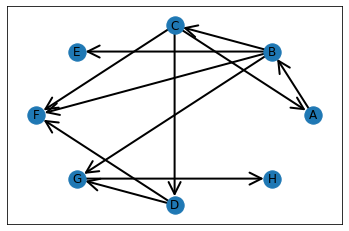

In [ ]:
edges = [('A', 'B'),
     ('B', 'C'),
     ('B', 'E'),
     ('B', 'F'),
     ('B', 'G'),
     ('C', 'A'),
     ('C', 'D'),
     ('C', 'F'),
     ('D', 'F'),
     ('D', 'G'),
     ('G', 'H')
    ]

G = pd.DataFrame(edges, columns=['In', 'Out'])
G['Weight'] = 1

nG = nx.from_pandas_edgelist(G, source='In', target='Out', edge_attr='Weight', create_using=nx.DiGraph)
options = {
    'width': 2,
    'arrowstyle': '->',
    'arrowsize': 30,
}
pos = nx.circular_layout(nG)   
nx.draw_networkx(nG, pos, with_labels = True, 
                 edge_color = 'black', arrows=True, **options)

new_graph = G.groupby('In').apply(lambda x: list(x['Out'])).to_dict()
new_graph

#### Python Programming - Iterables and Generators

Recall iterables

In [ ]:
example = [0,1,2,3]

for e in example:
    print(e)

0
1
2
3


In [ ]:
while example:
    print(example.pop())

3
2
1
0


We can create an iterable and define the corresponding methods.

In [ ]:
class anIterable():
    
    def __init__(self, limit):
        self.collection = list(range(limit))
        self.pointer = 0
        
    def __iter__(self):
        return self
        
    def __next__(self):
        if self.pointer < len(self.collection):
            self.pointer += 1
            return self.collection[self.pointer-1]
        else:
            raise StopIteration
    
    def __len__(self):
        return len(self.collection)
    
    def pop(self):
        return self.collection.pop()
            
    def __str__(self):
        return str(self.collection)

In [ ]:
example = anIterable(4)
print(example)

[0, 1, 2, 3]


In [ ]:
for e in example:
    print(e)

0
1
2
3


In [ ]:
while example:
    print(example.pop())

3
2
1
0


In Python we can make use of the instruction ```yield``` to easily create an Iterable. The instruction itself returns a Generator.

In [ ]:
class anotherIterable():
    
    def __init__(self, limit):
        self.collection = list(range(limit))

        
    def __iter__(self):
        yield self.collection


In [ ]:
example = anotherIterable(4)
for value in example:
    print(value)

[0, 1, 2, 3]


In [ ]:
def iterable(limit):
    
    collection = list(range(limit))
    for value in collection:
        yield value

In [ ]:
example = iterable(4)

In [ ]:
for value in example:
    print(value)

0
1
2
3


In [ ]:
example = iterable(4)
print(next(example))
print(next(example))
print(next(example))
print(next(example))
print(next(example))

0
1
2
3


StopIteration: 

#### Back to our search algorithms

In [ ]:
import logging

logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S')

# keep this one to only show results
logging.getLogger().setLevel(logging.WARNING)
# keep this one to see the whole process
logging.getLogger().setLevel(logging.INFO)

def uninformed_search_path_visitors(graph: dict, init: str, goal: str):
    # keep path from the start
    path = ()
    queue = [(init, path)]
    # Iteration counter
    i=0
    while queue:
        # add iteration
        i+=1
        
        head = queue[0]
        current_node = head[0]
        path = head[1]
        
        remainder = queue[1:]

        # Show the queue
        logging.info('Iteration {}'.format(i))
        logging.info('Status:\n\nQueue :{}\nQueue Size: {}\nHead: {}\nCurrent Node: {}\nPath: {}\nRemainder:{}\n'.format(queue,len(queue),head,current_node, path, remainder))
        logging.info('Head:{}, Goal:{}, Reached Goal: {}'.format(current_node, goal, head == goal))
        if current_node == goal: 
            
            complete_path = path + (current_node,)
            print('\n########################### -> Found {}\nPath: {}'.format(goal, complete_path))
            
            # rememeber to update the queue
            queue = remainder
            # generate a solution    
            yield complete_path
        else:
            is_terminal_node = current_node not in graph
            logging.info('is Current Node a Terminal Node: {}'.format(is_terminal_node))
            if is_terminal_node:
                queue = remainder
                logging.info('Updated Queue: {}'.format(queue))
            else:
                updated_path = path + (current_node,)
                logging.info('Updated Path {}'.format(updated_path))
                
                possible_paths = [out for out in graph[current_node]] 
                logging.info('Possible path from Current Node {}: {}'.format(current_node, possible_paths))
                
                valid_paths = [out for out in possible_paths if out not in updated_path]
                logging.info('Nodes not yet visited from Current Node {}: {}'.format(current_node, valid_paths))
                
                valid_path_with_history = [(out, updated_path) for out in valid_paths]
                logging.info('Valid path from Current Node {}: \n\n{}\n'.format(current_node, valid_path_with_history))
                
                queue = remainder +  valid_path_with_history
                logging.info('Updated Queue: {}'.format(queue)) 
      
        logging.info('- - - - - - - - - - - - - - - - - - - -')

In [ ]:
for path in uninformed_search_path_visitors(new_graph, 'A', 'F'):
    print(path)

2021-06-03 00:51:17 INFO     Iteration 1
2021-06-03 00:51:17 INFO     Status:

Queue :[('A', ())]
Queue Size: 1
Head: ('A', ())
Current Node: A
Path: ()
Remainder:[]

2021-06-03 00:51:17 INFO     Head:A, Goal:F, Reached Goal: False
2021-06-03 00:51:17 INFO     is Current Node a Terminal Node: False
2021-06-03 00:51:17 INFO     Updated Path ('A',)
2021-06-03 00:51:17 INFO     Possible path from Current Node A: ['B']
2021-06-03 00:51:17 INFO     Nodes not yet visited from Current Node A: ['B']
2021-06-03 00:51:17 INFO     Valid path from Current Node A: 

[('B', ('A',))]

2021-06-03 00:51:17 INFO     Updated Queue: [('B', ('A',))]
2021-06-03 00:51:17 INFO     - - - - - - - - - - - - - - - - - - - -
2021-06-03 00:51:17 INFO     Iteration 2
2021-06-03 00:51:17 INFO     Status:

Queue :[('B', ('A',))]
Queue Size: 1
Head: ('B', ('A',))
Current Node: B
Path: ('A',)
Remainder:[]

2021-06-03 00:51:17 INFO     Head:B, Goal:F, Reached Goal: False
2021-06-03 00:51:17 INFO     is Current Node a Ter

2021-06-03 00:51:17 INFO     Head:H, Goal:F, Reached Goal: False
2021-06-03 00:51:17 INFO     is Current Node a Terminal Node: True
2021-06-03 00:51:17 INFO     Updated Queue: []
2021-06-03 00:51:17 INFO     - - - - - - - - - - - - - - - - - - - -



########################### -> Found F
Path: ('A', 'B', 'F')
('A', 'B', 'F')

########################### -> Found F
Path: ('A', 'B', 'C', 'F')
('A', 'B', 'C', 'F')

########################### -> Found F
Path: ('A', 'B', 'C', 'D', 'F')
('A', 'B', 'C', 'D', 'F')


### Depth First Search

{'A': ['B', 'E'], 'B': ['C', 'D'], 'E': ['F', 'G']}

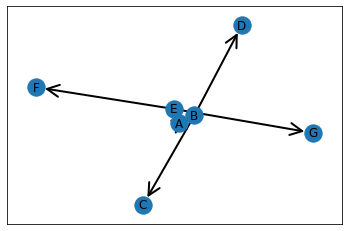

In [ ]:
edges = [('A', 'B'),
         ('A', 'E'),
     ('B', 'C'),
     ('B', 'D'),
     ('E', 'F'),
     ('E', 'G'),
    ]

G = pd.DataFrame(edges, columns=['In', 'Out'])
G['Weight'] = 1

nG = nx.from_pandas_edgelist(G, source='In', target='Out', edge_attr='Weight', create_using=nx.DiGraph)
options = {
    'width': 2,
    'arrowstyle': '->',
    'arrowsize': 30,
}
  
nx.draw_networkx(nG, with_labels = True, 
                 edge_color = 'black', arrows=True, **options)

a_graph = G.groupby('In').apply(lambda x: list(x['Out'])).to_dict()
a_graph

In [ ]:
class Stack:

    def __init__(self):
        self.stack = []
                    
    def append(self, item):
        self.stack.append(item)

    def pop(self):
        return self.stack.pop()
    
    def size(self):
        return len(self.stack)
    
    def __str__(self):
        return str(self.stack)

In [ ]:
def uninformed_search_path_visitors(graph: dict, struct, init: str, goal: str, verbose:bool=False):
    """

    """

    # keep path from the start
    path = ()
    out = init
    struct.append((out, path))

    # auxiliar - iteration counter
    i = 0

    while struct.size():

        # add iteration
        i += 1

        head = struct.pop()
        
        current_node = head[0]
        path = head[1]
        
        if verbose:
            # Show the queue
            print('Iteration {}'.format(i))
            print('Current Node: {}\nHead :{}\nQueue :{}\nSize: {}'.format(current_node,
                                                                           head,
                                                                           struct,
                                                                           struct.size()))

        if current_node == goal:
            print('################### Found {}\n# Path: {}'.format(goal, path))
            yield path + (current_node,)

        else:

            if current_node not in graph:
                continue
            else:
                new_path = path + (current_node,)

                possible_paths = [(out, new_path)
                                  for out in graph[current_node] if out not in new_path]
                
                for p in possible_paths:
                        struct.append(p)

In [ ]:
solutions = uninformed_search_path_visitors(graph, Stack(), 'A', 'F')

In [ ]:
sols = [s for s in solutions]

################### Found F
# Path: ('A', 'B')
################### Found F
# Path: ('A', 'B', 'C')
################### Found F
# Path: ('A', 'B', 'C', 'D')


In [ ]:
sols

[('A', 'B', 'F'), ('A', 'B', 'C', 'F'), ('A', 'B', 'C', 'D', 'F')]

In [ ]:
for s in solutions:
    print(s)

In [ ]:
for path in uninformed_search_path_visitors(a_graph, Stack(), 'A', 'G', verbose=True):
    print(path)

Iteration 1
Current Node: A
Head :('A', ())
Queue :[]
Size: 0
Iteration 2
Current Node: E
Head :('E', ('A',))
Queue :[('B', ('A',))]
Size: 1
Iteration 3
Current Node: G
Head :('G', ('A', 'E'))
Queue :[('B', ('A',)), ('F', ('A', 'E'))]
Size: 2
################### Found G
# Path: ('A', 'E')
('A', 'E', 'G')
Iteration 4
Current Node: F
Head :('F', ('A', 'E'))
Queue :[('B', ('A',))]
Size: 1
Iteration 5
Current Node: B
Head :('B', ('A',))
Queue :[]
Size: 0
Iteration 6
Current Node: D
Head :('D', ('A', 'B'))
Queue :[('C', ('A', 'B'))]
Size: 1
Iteration 7
Current Node: C
Head :('C', ('A', 'B'))
Queue :[]
Size: 0


### Breath First Search

In [ ]:
from collections import deque

class Queue:

    def __init__(self):
        self.queue = deque()

    def append(self, item):
        self.queue.append(item)

    def pop(self):
        return self.queue.popleft()
    
    def size(self):
        return len(self.queue)
    
    def __str__(self):
        return str(self.queue)

In [ ]:
for path in uninformed_search_path_visitors(a_graph, Queue(), 'A', 'G', verbose=True):
    print(path)

Iteration 1
Current Node: A
Head :('A', ())
Queue :deque([])
Size: 0
Iteration 2
Current Node: B
Head :('B', ('A',))
Queue :deque([('E', ('A',))])
Size: 1
Iteration 3
Current Node: E
Head :('E', ('A',))
Queue :deque([('C', ('A', 'B')), ('D', ('A', 'B'))])
Size: 2
Iteration 4
Current Node: C
Head :('C', ('A', 'B'))
Queue :deque([('D', ('A', 'B')), ('F', ('A', 'E')), ('G', ('A', 'E'))])
Size: 3
Iteration 5
Current Node: D
Head :('D', ('A', 'B'))
Queue :deque([('F', ('A', 'E')), ('G', ('A', 'E'))])
Size: 2
Iteration 6
Current Node: F
Head :('F', ('A', 'E'))
Queue :deque([('G', ('A', 'E'))])
Size: 1
Iteration 7
Current Node: G
Head :('G', ('A', 'E'))
Queue :deque([])
Size: 0
################### Found G
# Path: ('A', 'E')
('A', 'E', 'G')


### Exercise

Apply the both searches to the ```new_graph``` and interpret the resulting paths.